In [ ]:
#1. (20 pts) Generate a figure from the given dataset that resembles Figure 1.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dataset =  pd.read_csv('spiral-dataset.csv', delimiter='\t',header=None)

In [27]:
ds_y = dataset[2]
#print(ds_y)

In [5]:
ds1 = dataset.drop([2] , axis =1)
print(ds1.shape)

(312, 2)


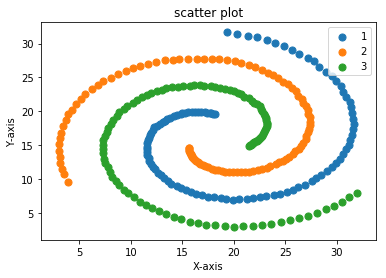

In [8]:
x = dataset.iloc[:,0]
y= dataset.iloc[:,1]
l = dataset.iloc[:,2]
#l = ("black", "green", "blue")

for g in np.unique(l):
    #plt.scatter(x.loc[l==g],y.loc[l==g],c= dataset.iloc[:,2], alpha= 1 , s=50)
    plt.scatter(x.loc[l==g],y.loc[l==g], alpha= 1, s=50,label=g)
# plt.legend( (1,2,3) , "1,2,3",scatterpoints=1,ncol=3, loc='best',fontsize=5)
plt.title('scatter plot')
plt.legend(loc='best' , fontsize=10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [9]:
#2 (40 pts) Implement the k-means clustering algorithm. And do the following:
# 2.a) Run your k-means algorithm on the given dataset setting the value k=3 (because
# visually we only have 3 clusters to worry about). And do not forget to randomly initialize
# the 3 centroids.

In [10]:
# Number of clusters
k = 3
# Number of training data
n = ds1.shape[0]
#print(k.shape())

# Number of features in the data
c = ds1.shape[1]
print(c)

2


In [11]:
type(dataset)

pandas.core.frame.DataFrame

In [29]:
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(ds1.values)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(ds1.values)-20, size=k)
centers = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(centers)

[[6. 5.]
 [9. 1.]
 [3. 7.]]


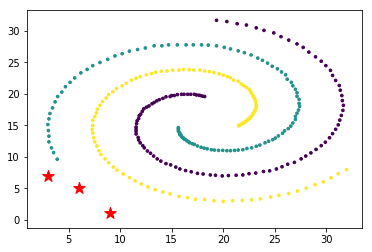

In [223]:
plt.scatter(ds1.iloc[:,0], ds1.iloc[:,1],c = dataset.iloc[:,2] ,s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='r', s=150)

In [251]:
from copy import deepcopy
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

ds1.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

Sum_error = np.zeros(n)
error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
   
   
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(ds1.values - centers_new[i], axis=1)
        #distances[:,i] = euclidean_distances(ds1,centers[i], axis = 1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(ds1[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
    #error = euclidean_distances(ds1,centers_new[i])
        #print(error)
    error1 = error*error
Sum_error = Sum_error + error1
# centers_new 
# Sum_error

In [32]:
print(centers_new)
print(Sum_error)

[[23.438383 22.582323]
 [21.568056  9.733796]
 [10.415238 17.263334]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

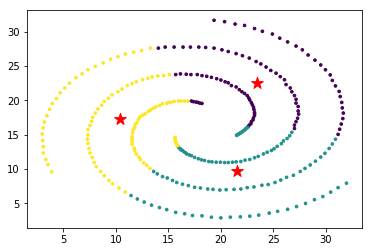

In [224]:
plt.scatter(ds1.iloc[:,0], ds1.iloc[:,1], c = clusters ,s=7)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='r', s=150)

In [34]:
sse_clusts = []
for cls in np.unique(clusters):
    clust_dists = np.sum(np.linalg.norm(ds1.values[clusters == cls] - centers_new[cls]))
    sse_clusts.append(clust_dists)

In [35]:
np.sum(sse_clusts)

191.96225009528814

In [36]:
# 2.b) Once your k-means algorithm has converged above, stop and from your clustering
# result compute the intrinsic performance metric: Sum of Squared Error, SSE (smaller the
# better), and the extrinsic performance metric: Rand-Index, RI (higher the better). For the
# definition of both, please continue reading.

In [ ]:
#Sum of squared errors is done above . below is for RI.

In [161]:
#print(y_pred)
y_out = clusters
y_out1 = np.array(y_out).astype('int32')
#for u in range(312):
y_out1 = y_out1 +1
print(y_out1)
print(type(y_out1))
print(type(ds_y))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3]
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [125]:
from sklearn.metrics import confusion_matrix

def calcri(y_true,y_pred):
    t = confusion_matrix(y_true,y_pred)
    fp = t.sum(axis=0) - np.diag(t)  
    fn = t.sum(axis=1) - np.diag(t)
    tp = np.diag(t)
    tn = t.sum() - (fp + fn + tp)
    RI = (tp+tn)/(tp+tn+fp+fn)
#     print(t)
#     print(fp)
#     print(tp)
#     print(tn)
#     print(fn)
#     print(RI)
    return RI



In [128]:
one = calcri(ds_y,y_out1)
print(one)


[0.57051282 0.55448718 0.54807692]


In [ ]:
# 2.c) Repeat Task (2.a) & (2.b) another 9 (nine) times randomizing again the initial centroids,
# and report out of the 10 runs of k-means what is the best SSE & RI you could get.

0


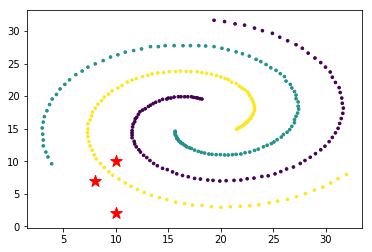

[[ 8.  7.]
 [10. 10.]
 [10.  2.]]


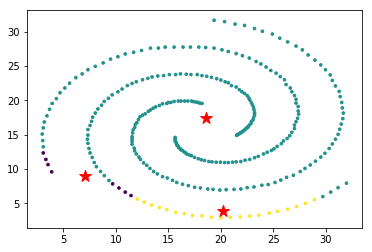

[[ 7.03125   8.9875  ]
 [18.59894  17.472792]
 [20.171429  3.945238]]
195.4518016371553
[0.65064103 0.40384615 0.7275641 ]


In [308]:
from copy import deepcopy
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances
k=3
n = ds1.shape[0]
#def k_means(k):
for gh in range(1):
    print(gh)
  
    C2_x = np.random.randint(0, np.max(ds1.values)-20, size=k)
    C2_y = np.random.randint(0, np.max(ds1.values)-20, size=k)
    centers2 = np.array(list(zip(C2_x, C2_y)), dtype=np.float32)
    
    plt.scatter(ds1.iloc[:,0], ds1.iloc[:,1],c = dataset.iloc[:,2] ,s=7)
    plt.scatter(centers2[:,0], centers2[:,1], marker='*', c='r', s=150)
    plt.show()
    print(centers2)
    
    centers2_old = np.zeros(centers2.shape) 
    centers2_new = deepcopy(centers2) 
    clusters2 = np.zeros(n)
    distances2 = np.zeros((n,k))

    error2 = np.linalg.norm(centers2_new - centers2_old)
    #print(error2)
    while error2 != 0:
        #print("inside while")
        for i in range(k):
            #print("inside 1st for")
            distances2[:,i] = np.linalg.norm(ds1.values - centers2[i], axis=1)
 
        clusters2 = np.argmin(distances2, axis = 1)
    
        centers2_old = deepcopy(centers2_new)
      
        for i in range(k):
            #print("inside 2nd for")
            centers2_new[i] = np.mean(ds1[clusters2 == i], axis=0)
        error2 = np.linalg.norm(centers2_new - centers2_old)
          
    plt.scatter(ds1.iloc[:,0], ds1.iloc[:,1], c = clusters2 ,s=7)
    plt.scatter(centers2_new[:,0], centers2_new[:,1], marker='*', c='r', s=150) 
    plt.show()
    print(centers2_new)
        
    sse2_clusts = []
    for cls2 in np.unique(clusters2):
        clust2_dists = np.sum(np.linalg.norm(ds1.values[clusters2 == cls2] - centers2_new[cls2]))
        sse2_clusts.append(clust2_dists)
    sse2=np.sum(sse2_clusts)
 
    print(sse2)
    
    y_out_kmeans = clusters2
    y_out_kmeans1 = np.array(y_out_kmeans).astype('int32')
    y_out_kmeans1 = y_out_kmeans1 +1
    #print(y_out_kmeans1)
    RI_kmeans = calcri(ds_y,y_out_kmeans1)
    print(RI_kmeans)
    #return sse2 , RI_kmeans

In [303]:
#Run1
sse: 191.96225009528814
RI: [0.57051282 0.55448718 0.54807692]
    
#Run2
sse:215.30681337193738
RI:[0.54487179 0.69551282 0.49038462]
    
#Run3
sse:193.33843859280745
RI:[0.63782051 0.4775641  0.6474359 ]
    
#Run4
sse:227.66535228019757
RI:[0.50961538 0.53205128 0.50961538]
    
#Run5
sse:207.4818235638975
RI:[0.63782051 0.54487179 0.50320513]
    
#Run6
sse:186.08908618510173
RI:[0.65064103 0.3525641  0.65064103]
    
#run7
sse:175.09703183439984
RI:[0.66346154 0.66666667 0.35576923]
    
#run8
sse:222.72836364141236
RI:[0.47435897 0.59935897 0.64423077]
    
#Run9
sse:185.63134596230273
RI:[0.63461538 0.34294872 0.70833333]
    
#Run10
sse:195.4518016371553
RI:[0.65064103 0.40384615 0.7275641 ]
    
    
best run and value is run 7 which has low sse and RI combination 
    
Best sse = 175.097
best RI = [0.47435897 0.59935897 0.64423077]

SyntaxError: invalid syntax (<ipython-input-303-e37e5a4359f0>, line 3)

In [241]:
# 3. (40 pts) Implement the Hierarchical clustering algorithm. And do the following:
# 3.a) Using the “single linkage” method, run the hierarchical clustering algorithm on the
# dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report
# SSE and RI.

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
%matplotlib inline

In [69]:
def single_distance(clusters3 ,cluster_num3):
    #print('first cluster | ','second cluster | ', 'distance')
    while len(clusters3) is not cluster_num3:
    
        closest_distance3=clust3_1=clust3_2 = math.inf
    
        for cluster_id3, cluster3 in enumerate(clusters3[:len(clusters3)]): 
        
            for point_id3,point3 in enumerate(cluster3): 
            
                for cluster2_id3, cluster23 in enumerate(clusters3[(cluster_id3+1):]): 
                
                    for point2_id3, point23 in enumerate(cluster23):

                        if distance.euclidean(point3,point23) < closest_distance3: 
                            
                            closest_distance3 = distance.euclidean(point3,point23)
            
                            clust3_1 = cluster_id3
                
                            clust3_2 = cluster2_id3+cluster_id3+1
            
        #print(clust3_1,' | ',clust3_2, ' | ',closest_distance3)
        clusters3[clust3_1].extend(clusters3[clust3_2]) 
        
        clusters3.pop(clust3_2) 
    return(clusters3)

In [70]:
### Hierarchical clustering
def hierarchical(data, cluster_num, metric = 'single'):
    # initialization of clusters at first (every point is a cluster)
    init_clusters=[]
    for index, row in data.iterrows():
        init_clusters.append([[row[0], row[1]]])
    if metric is 'single':
        return single_distance(init_clusters, cluster_num)

In [74]:
a = hierarchical(ds1,3,metric = 'single')
print(a)

[[[31.95, 7.95], [31.15, 7.3], [30.45, 6.65], [29.7, 6.0], [28.9, 5.55], [28.05, 5.0], [27.2, 4.55], [26.35, 4.15], [25.4, 3.85], [24.6, 3.6], [23.6, 3.3], [22.75, 3.15], [21.85, 3.05], [20.9, 3.0], [20.0, 2.9], [19.1, 3.0], [18.2, 3.2], [17.3, 3.25], [16.55, 3.5], [15.7, 3.7], [14.85, 4.1], [14.15, 4.4], [13.4, 4.75], [12.7, 5.2], [12.05, 5.65], [11.45, 6.15], [10.9, 6.65], [10.3, 7.25], [9.7, 7.85], [9.35, 8.35], [8.9, 9.05], [8.55, 9.65], [8.15, 10.35], [7.95, 10.95], [7.75, 11.7], [7.55, 12.35], [7.45, 13.0], [7.35, 13.75], [7.3, 14.35], [7.35, 14.95], [7.35, 15.75], [7.55, 16.35], [7.7, 16.95], [7.8, 17.55], [8.05, 18.15], [8.3, 18.75], [8.65, 19.3], [8.9, 19.85], [9.3, 20.3], [9.65, 20.8], [10.2, 21.25], [10.6, 21.65], [11.1, 22.15], [11.55, 22.45], [11.95, 22.7], [12.55, 23.0], [13.05, 23.2], [13.45, 23.4], [14.0, 23.55], [14.55, 23.6], [15.1, 23.75], [15.7, 23.75], [16.15, 23.85], [16.7, 23.8], [17.15, 23.75], [17.75, 23.75], [18.2, 23.6], [18.65, 23.5], [19.1, 23.35], [19.6, 2

In [183]:
#RI
print(type(ds_y))
for cluster_index, cluster in enumerate(a):
    for point_index, point in enumerate(cluster):
        #print(cluster_index)
        y_hsingle11 = cluster_index
        y_hsingle1 = np.array(y_hsingle11).astype('int32')
        y_hsingle1 = y_hsingle1 +1
        print(y_hsingle1)
#         RI_hsingle = calcri(ds_y ,y_hsingle1)
#         print(RI_hsingle)    



<class 'pandas.core.series.Series'>
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


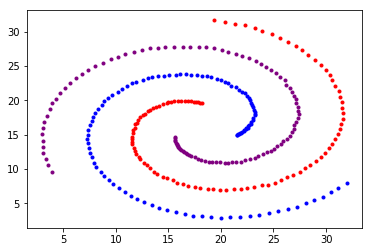

In [337]:
colors = ['blue', 'red', 'purple']
for cluster_index, cluster in enumerate(a):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])

In [ ]:
# 3.b) Using the “complete linkage” method, run the hierarchical clustering algorithm on the
# dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report
# SSE and RI.

In [81]:
def complete_distance(clusters ,cluster_num):
    #print('first cluster | ','second cluster | ', 'distance')
    while len(clusters) is not cluster_num:
        
        closest_distance=clust_1=clust_2 = math.inf
    
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]):  
                furthest_cluster_dist = -1

                for point_id,point in enumerate(cluster): 
                    for point2_id, point2 in enumerate(cluster2):

                        if furthest_cluster_dist < distance.euclidean(point,point2): 
                            furthest_cluster_dist = distance.euclidean(point,point2)

                if furthest_cluster_dist < closest_distance:
                    closest_distance = furthest_cluster_dist
                    clust_1 = cluster_id
                    clust_2 = cluster2_id+cluster_id+1
            
        #print(clust_1,' | ',clust_2, ' | ',closest_distance)
        clusters[clust_1].extend(clusters[clust_2]) 
        
        clusters.pop(clust_2) 
    return(clusters)

In [82]:
def hierarchical1(data, cluster_num1, metric = 'complete'):
    # initialization of clusters at first (every point is a cluster)
    init_clusters1=[]
    for index, row in data.iterrows():
        init_clusters1.append([[row[0], row[1]]])
    if metric is 'complete':
        return complete_distance(init_clusters1, cluster_num1)

In [83]:
b = hierarchical1(ds1,3,metric = 'complete')
print(b)

[[[31.95, 7.95], [31.15, 7.3], [30.45, 6.65], [29.0, 11.15], [28.5, 10.6], [28.0, 10.1], [27.55, 9.65], [29.7, 6.0], [28.9, 5.55], [28.05, 5.0], [27.2, 4.55], [26.35, 4.15], [26.9, 9.1], [26.25, 8.8], [25.7, 8.4], [25.15, 8.05], [25.4, 3.85], [24.6, 3.6], [23.6, 3.3], [22.75, 3.15], [21.85, 3.05], [24.5, 7.75], [23.9, 7.65], [23.15, 7.4], [22.5, 7.3], [21.9, 7.1], [21.25, 7.05], [20.9, 3.0], [20.0, 2.9], [19.1, 3.0], [18.2, 3.2], [20.5, 7.0], [19.9, 6.95], [19.25, 7.05], [18.75, 7.1], [23.05, 17.15], [22.9, 16.9], [22.85, 16.6], [22.7, 16.4], [22.6, 16.2], [22.55, 16.05], [22.4, 15.95], [22.35, 15.8], [22.2, 15.65], [22.15, 15.55], [22.0, 15.4], [21.9, 15.3], [21.85, 15.25], [21.75, 15.15], [21.65, 15.05], [21.55, 15.0], [21.5, 14.9], [25.95, 14.1], [25.75, 13.7], [25.35, 13.3], [25.05, 12.95], [24.8, 12.7], [24.4, 12.45], [24.05, 12.2], [23.55, 11.85], [23.2, 11.65], [22.75, 11.4], [22.3, 11.3], [21.9, 11.1], [21.45, 11.05], [21.1, 11.0], [20.7, 10.95], [20.35, 10.95], [19.95, 11.0], 

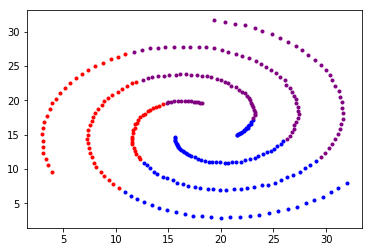

In [84]:
colors = ['blue', 'red', 'purple']
for cluster_index1, cluster1 in enumerate(b):
    for point_index1, point1 in enumerate(cluster1):
        plt.plot([point1[0]], [point1[1]], marker='o', markersize=3, color=colors[cluster_index1])

In [ ]:
# 3.c) Using the “average linkage” method, run the hierarchical clustering algorithm on the
# dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report
# SSE and RI.

In [86]:
from sklearn.cluster import AgglomerativeClustering
clu_avg = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None, n_clusters=3,
            pooling_func='deprecated')
clustering_avg = clu_avg.fit(ds1)
labels_avg =  clu_avg.fit_predict(ds1)
print(clustering_avg)
print(labels_avg)
print(clu_avg)
print(clu_avg.labels_)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3, pooling_func='deprecated')
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3, pooling_func='dep

In [97]:
#print(y_pred)
y_out_avg =labels_avg
y_out1_avg = np.array(y_out_avg).astype('int32')
y_out1_avg = y_out1_avg +1
print(y_out1_avg)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [185]:
#RI
RI_havg = calcri(ds_y,y_out1_avg)
print(RI_havg)

[0.50961538 0.51923077 0.60576923]


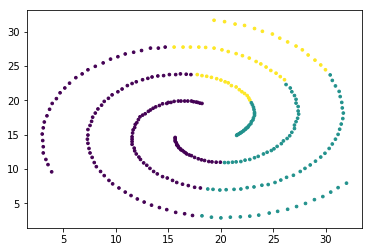

In [96]:
plt.scatter(ds1.iloc[:,0], ds1.iloc[:,1] , c= labels_avg,s=7)
plt.show()

In [ ]:
#scipy.cluster.hierarchy 3.d) Using the “centroid linkage” method, run the hierarchical clustering algorithm on the
# dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report
# SSE and RI.scipy.cluster.hierarchy

In [331]:
print(ds1.shape)
from scipy.cluster.hierarchy import linkage

clu_centroid = linkage(ds1, 'centroid')
# clu = clu_centroid.fit(ds1)
# cl = linkage.predict(ds1,'centroid')
# clustering_centroid = clu_centroid.fit(ds1)
# labels_centroid =  clu_centroid.fit_predict(ds1)
# print(clustering_centroid)
# print(labels_centroid)
print(clu_centroid)
#print(clu_centroid.labels_)
print(clu_centroid.shape)


(312, 2)
[[1.00000000e+02 1.01000000e+02 7.07106781e-02 2.00000000e+00]
 [3.10000000e+02 3.11000000e+02 1.00000000e-01 2.00000000e+00]
 [1.03000000e+02 1.04000000e+02 1.11803399e-01 2.00000000e+00]
 ...
 [6.13000000e+02 6.19000000e+02 1.18591590e+01 1.31000000e+02]
 [6.15000000e+02 6.18000000e+02 1.25524566e+01 1.81000000e+02]
 [6.20000000e+02 6.21000000e+02 1.17089614e+01 3.12000000e+02]]
(311, 4)


In [ ]:
# 3.e) Please comment, out of the 4 clustering results (3.a), (3.b), (3.c) and (3.d) which
# method gets you the best SSE as well as RI.

In [ ]:
# ANS: i feel average linkage is better than the rest because it takes into consideration the average of distances 

In [ ]:
#EXTRA CREDIT 

In [ ]:
#E1: (10 pts) Please draw the clustering results (like Figure 1) for all of task 2.

In [ ]:
#done alongside the task above for all task 2 

In [ ]:
#E2: (10 pts) Please draw clustering results (like Figure 1) for all of task 3.

In [ ]:
#Done alonside task 3

In [ ]:
#E3: (10 pts) Please draw the dendrograms for each of the 4 hierarchical clustering results. Hint: there
#are library functions to take care of the dendrogram plotting, and you can leverage that.

In [189]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

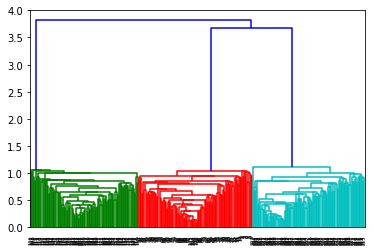

In [440]:

Z = hierarchy.linkage(ds1, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)


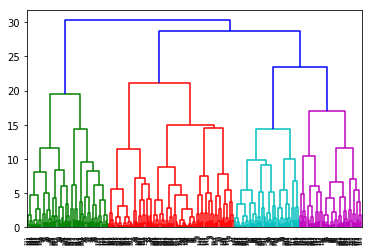

In [441]:
Z1 = hierarchy.linkage(ds1, 'complete')
plt.figure()
dn1 = hierarchy.dendrogram(Z1)


[[1.00000000e+02 1.01000000e+02 7.07106781e-02 2.00000000e+00]
 [3.10000000e+02 3.11000000e+02 1.00000000e-01 2.00000000e+00]
 [1.03000000e+02 1.04000000e+02 1.11803399e-01 2.00000000e+00]
 ...
 [6.11000000e+02 6.18000000e+02 1.16135978e+01 1.54000000e+02]
 [6.13000000e+02 6.19000000e+02 1.40906556e+01 1.58000000e+02]
 [6.20000000e+02 6.21000000e+02 1.55677724e+01 3.12000000e+02]]
(311, 4)


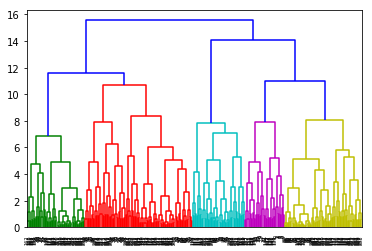

In [316]:
z2 = hierarchy.linkage(ds1, 'average')
print(z2)
print(z2.shape)
plt.figure()
dn2 = hierarchy.dendrogram(z2)

[[1.00000000e+02 1.01000000e+02 7.07106781e-02 2.00000000e+00]
 [3.10000000e+02 3.11000000e+02 1.00000000e-01 2.00000000e+00]
 [1.03000000e+02 1.04000000e+02 1.11803399e-01 2.00000000e+00]
 ...
 [6.13000000e+02 6.19000000e+02 1.18591590e+01 1.31000000e+02]
 [6.15000000e+02 6.18000000e+02 1.25524566e+01 1.81000000e+02]
 [6.20000000e+02 6.21000000e+02 1.17089614e+01 3.12000000e+02]]


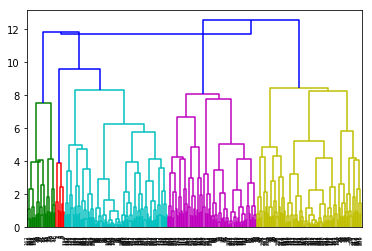

In [194]:
z3 = hierarchy.linkage(ds1, 'centroid')
print(z3)
plt.figure()
dn3 = hierarchy.dendrogram(z3)

In [315]:
print(z3.shape)
print(dn3)

(311, 4)
{'icoord': [[5.0, 5.0, 15.0, 15.0], [25.0, 25.0, 35.0, 35.0], [10.0, 10.0, 30.0, 30.0], [45.0, 45.0, 55.0, 55.0], [65.0, 65.0, 75.0, 75.0], [50.0, 50.0, 70.0, 70.0], [20.0, 20.0, 60.0, 60.0], [85.0, 85.0, 95.0, 95.0], [105.0, 105.0, 115.0, 115.0], [90.0, 90.0, 110.0, 110.0], [135.0, 135.0, 145.0, 145.0], [125.0, 125.0, 140.0, 140.0], [165.0, 165.0, 175.0, 175.0], [155.0, 155.0, 170.0, 170.0], [132.5, 132.5, 162.5, 162.5], [100.0, 100.0, 147.5, 147.5], [40.0, 40.0, 123.75, 123.75], [185.0, 185.0, 195.0, 195.0], [205.0, 205.0, 215.0, 215.0], [190.0, 190.0, 210.0, 210.0], [225.0, 225.0, 235.0, 235.0], [255.0, 255.0, 265.0, 265.0], [245.0, 245.0, 260.0, 260.0], [230.0, 230.0, 252.5, 252.5], [200.0, 200.0, 241.25, 241.25], [81.875, 81.875, 220.625, 220.625], [285.0, 285.0, 295.0, 295.0], [275.0, 275.0, 290.0, 290.0], [305.0, 305.0, 315.0, 315.0], [335.0, 335.0, 345.0, 345.0], [325.0, 325.0, 340.0, 340.0], [310.0, 310.0, 332.5, 332.5], [282.5, 282.5, 321.25, 321.25], [355.0, 355.0, 

In [ ]:
#E4: (10 pts) Consider the “cosine similarity” instead of “Euclidean distance” in solving for task 3.

[[1.45000000e+02 1.47000000e+02 7.11641857e-12 2.00000000e+00]
 [2.66000000e+02 2.89000000e+02 2.39449238e-10 2.00000000e+00]
 [3.50000000e+01 1.06000000e+02 3.90168786e-10 2.00000000e+00]
 ...
 [6.13000000e+02 6.19000000e+02 2.41390926e-04 2.91000000e+02]
 [2.00000000e+01 6.14000000e+02 3.25351554e-04 2.10000000e+01]
 [6.20000000e+02 6.21000000e+02 5.14922835e-04 3.12000000e+02]]


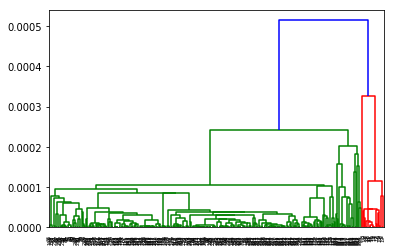

In [454]:
from scipy.cluster.hierarchy import dendrogram, linkage
zzz1 = linkage(ds1, method ='single' , metric='cosine')
print(zzz1)
plt.figure()
ddd1 = hierarchy.dendrogram(zzz1)

[[1.45000000e+02 1.47000000e+02 7.11641857e-12 2.00000000e+00]
 [2.66000000e+02 2.89000000e+02 2.39449238e-10 2.00000000e+00]
 [3.50000000e+01 1.06000000e+02 3.90168786e-10 2.00000000e+00]
 ...
 [6.17000000e+02 6.18000000e+02 1.84098154e-01 1.39000000e+02]
 [6.15000000e+02 6.19000000e+02 1.86932768e-01 1.73000000e+02]
 [6.20000000e+02 6.21000000e+02 6.80442218e-01 3.12000000e+02]]


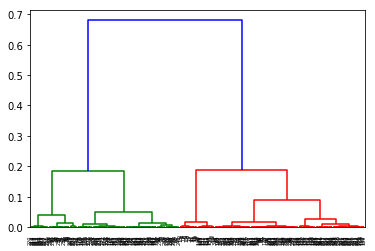

In [196]:
from scipy.cluster.hierarchy import dendrogram, linkage
zzz2 = linkage(ds1, method ='complete' , metric='cosine')
print(zzz2)
plt.figure()
ddd2 = hierarchy.dendrogram(zzz2)
#print(ddd2)

[[1.45000000e+02 1.47000000e+02 7.11641857e-12 2.00000000e+00]
 [2.66000000e+02 2.89000000e+02 2.39449238e-10 2.00000000e+00]
 [3.50000000e+01 1.06000000e+02 3.90168786e-10 2.00000000e+00]
 ...
 [6.14000000e+02 6.18000000e+02 6.70813617e-02 1.29000000e+02]
 [6.12000000e+02 6.19000000e+02 8.43264016e-02 1.83000000e+02]
 [6.20000000e+02 6.21000000e+02 1.49975217e-01 3.12000000e+02]]


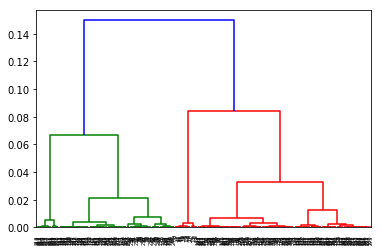

In [456]:
from scipy.cluster.hierarchy import dendrogram, linkage
zzz3 = linkage(ds1, method ='average' , metric='cosine')
print(zzz3)
plt.figure()
ddd3 = hierarchy.dendrogram(zzz3)

In [ ]:
# E5: (10 pts) Consider “L3 distance” instead of “Euclidean distance (i.e., L2 distance)” in solving for task
# 3.

[[1.00000000e+02 1.01000000e+02 7.07106781e-02 2.00000000e+00]
 [3.10000000e+02 3.11000000e+02 1.00000000e-01 2.00000000e+00]
 [1.03000000e+02 1.04000000e+02 1.11803399e-01 2.00000000e+00]
 ...
 [2.07000000e+02 6.12000000e+02 1.10679718e+00 1.05000000e+02]
 [6.17000000e+02 6.20000000e+02 3.66776499e+00 2.11000000e+02]
 [6.19000000e+02 6.21000000e+02 3.82099463e+00 3.12000000e+02]]


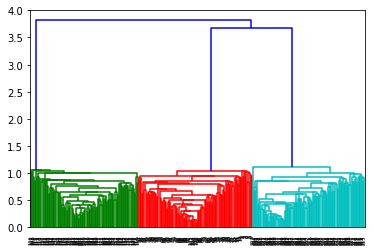

In [338]:
from scipy.cluster.hierarchy import dendrogram, linkage
sss1 = linkage(ds1, method ='single' , metric='minkowski')
print(sss1)
plt.figure()
ggg1 = hierarchy.dendrogram(sss1)

[[1.00000000e+02 1.01000000e+02 7.07106781e-02 2.00000000e+00]
 [3.10000000e+02 3.11000000e+02 1.00000000e-01 2.00000000e+00]
 [1.03000000e+02 1.04000000e+02 1.11803399e-01 2.00000000e+00]
 ...
 [6.14000000e+02 6.17000000e+02 2.34393366e+01 1.19000000e+02]
 [6.19000000e+02 6.20000000e+02 2.87573469e+01 2.36000000e+02]
 [6.18000000e+02 6.21000000e+02 3.03077548e+01 3.12000000e+02]]


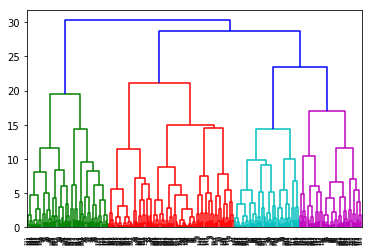

In [309]:
from scipy.cluster.hierarchy import dendrogram, linkage
sss2 = linkage(ds1, method ='complete' , metric='minkowski')
print(sss2)
plt.figure()
ggg2 = hierarchy.dendrogram(sss2)

[[1.00000000e+02 1.01000000e+02 7.07106781e-02 2.00000000e+00]
 [3.10000000e+02 3.11000000e+02 1.00000000e-01 2.00000000e+00]
 [1.03000000e+02 1.04000000e+02 1.11803399e-01 2.00000000e+00]
 ...
 [6.11000000e+02 6.18000000e+02 1.16135978e+01 1.54000000e+02]
 [6.13000000e+02 6.19000000e+02 1.40906556e+01 1.58000000e+02]
 [6.20000000e+02 6.21000000e+02 1.55677724e+01 3.12000000e+02]]


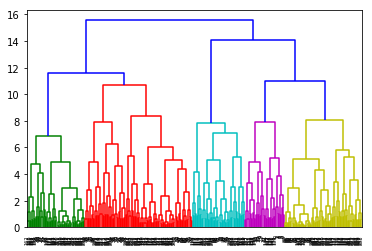

In [310]:
from scipy.cluster.hierarchy import dendrogram, linkage
sss3 = linkage(ds1, method ='average' , metric='minkowski')
print(sss3)
plt.figure()
ggg3 = hierarchy.dendrogram(sss3)